In [58]:
import numpy as np
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras import layers, models
from keras.layers import Activation, Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


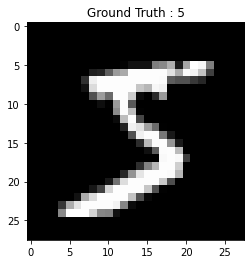

In [59]:
#load the number images dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#display the first image in the training data
plt.imshow(x_train[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(y_train[0]))
plt.show()

In [60]:
#setting the shape of the data to a variable
dimData = np.prod(x_train.shape[1:])

# flatten data and scale
x_train_scaled = x_train.reshape(60000, 784).astype("float32") / 255
x_test_scaled = x_test.reshape(10000, 784).astype("float32") / 255

In [61]:
# function to plot graph for variety of metrics from https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

##### categorical is for one hot encoded data
##### sparse is for integer data
##### so using the data with to_categorical made it one hot encoded and caused the error

# 1.1

In [62]:
# sequential model with elu activation

#changing to relu or tanh had very little impact, the rund are too random 
model_scaled = Sequential()
model_scaled.add(Dense(512, activation='elu', input_shape=(dimData,)))
model_scaled.add(Dense(512, activation='elu'))
model_scaled.add(Dense(10, activation='softmax'))

model_scaled.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#fitting the sequential scaled model
with tf.device('/GPU:0'):
    history = model_scaled.fit(x_train_scaled, y_train, batch_size=256, epochs=20, verbose=1, validation_data=(x_test_scaled, y_test))


Epoch 1/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3747 - accuracy: 0.8858 - val_loss: 0.3397 - val_accuracy: 0.8921
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1676 - accuracy: 0.9485 - val_loss: 0.1656 - val_accuracy: 0.9446
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1075 - accuracy: 0.9668 - val_loss: 0.1164 - val_accuracy: 0.9637
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0804 - accuracy: 0.9745 - val_loss: 0.1165 - val_accuracy: 0.9650
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0631 - accuracy: 0.9800 - val_loss: 0.0878 - val_accuracy: 0.9720
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0500 - accuracy: 0.9831 - val_loss: 0.0962 - val_accuracy: 0.9718
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0418 - accuracy: 0.9861 - val_loss: 0.1148 - val_accuracy: 0.9681
Epoch 

# 1.2

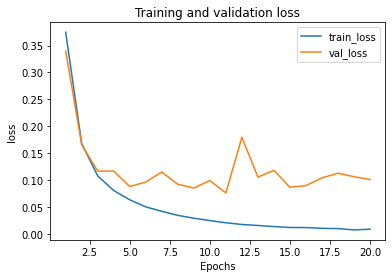

In [63]:
#plotting loss
plot_metric(history,'loss')

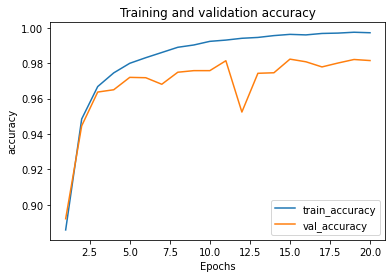

In [64]:
#plotting accuracy
plot_metric(history,'accuracy')

# 1.3

In [65]:
#saving the data without scaling
x_train_no_scale = x_train.reshape(60000, 784).astype("float32") 
x_test_no_scale = x_test.reshape(10000, 784).astype("float32") 

In [66]:
#creating a sequential model without scaling with elu activation

#compared to scaled model, validation accuracy is usually ~1% worse
model_no_scale = Sequential()
model_no_scale.add(Dense(512, activation='elu', input_shape=(dimData,)))
model_no_scale.add(Dense(512, activation='elu'))
model_no_scale.add(Dense(10, activation='softmax'))


model_no_scale.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#fitting the sequential non scaled model
with tf.device('/GPU:0'):
    history_no_scale = model_no_scale.fit(x_train_no_scale, y_train, batch_size=256, epochs=20, verbose=1, validation_data=(x_test_no_scale, y_test))

Epoch 1/20
235/235 [==============================] - 1s 3ms/step - loss: 5.2142 - accuracy: 0.8834 - val_loss: 0.9366 - val_accuracy: 0.9194
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.4563 - accuracy: 0.9456 - val_loss: 0.5461 - val_accuracy: 0.9260
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2868 - accuracy: 0.9579 - val_loss: 0.4312 - val_accuracy: 0.9482
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2206 - accuracy: 0.9662 - val_loss: 0.4229 - val_accuracy: 0.9572
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1986 - accuracy: 0.9720 - val_loss: 0.3525 - val_accuracy: 0.9531
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1718 - accuracy: 0.9761 - val_loss: 0.3941 - val_accuracy: 0.9660
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1552 - accuracy: 0.9799 - val_loss: 0.4918 - val_accuracy: 0.9572
Epoch 

# 1.4

In [67]:
#creating the same model but with functional api with relu activation

#results are similar to the sequential model 

inputs = keras.Input(shape=(dimData,))
dense = layers.Dense(512, activation="relu")
x = dense(inputs)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(10)(x)
model_functional = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

model_functional.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"]
)


model_functional.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_42 (Dense)            (None, 512)               401920    
                                                                 
 dense_43 (Dense)            (None, 512)               262656    
                                                                 
 dense_44 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [68]:
#fitting the functional model with scaled data
with tf.device('/GPU:0'):
    history_func = model_functional.fit(x_train_scaled, y_train, batch_size=256, epochs=20, verbose=1,validation_data=(x_test_scaled, y_test))

Epoch 1/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2714 - accuracy: 0.9163 - val_loss: 0.1819 - val_accuracy: 0.9439
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0929 - accuracy: 0.9716 - val_loss: 0.2488 - val_accuracy: 0.9264
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0584 - accuracy: 0.9821 - val_loss: 0.0817 - val_accuracy: 0.9751
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0402 - accuracy: 0.9874 - val_loss: 0.1041 - val_accuracy: 0.9699
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.0608 - val_accuracy: 0.9818
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0211 - accuracy: 0.9933 - val_loss: 0.0836 - val_accuracy: 0.9764
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.0790 - val_accuracy: 0.9811
Epoch 

In [69]:
#setting an index value
value = 4

# 1.5

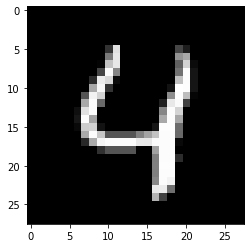

In [70]:
#printing the image at the index
plt.imshow(x_test[value],cmap='gray')

In [71]:
#running the predction function
y_pred = model_functional.predict(x_test_scaled)

#printing the prediction at the index and using argmax to print out the highest predicted value of the output to get result
print("max: ",np.argmax(y_pred[value]))
print("pred: ",y_pred[value])

max:  4
pred:  [-24.270279  -23.793074  -24.940802  -36.21257    18.849012  -28.948935
 -20.743755  -10.648095  -25.43299    -4.0831347]
